In [ ]:
#IMPORT LIBRARY
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_20newsgroups

In [4]:
#FETCH DATA
data = fetch_20newsgroups()
categories = data.target_names
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [5]:
#MAKE A VOCA SET
vocab_set = set()
for dstr in train.data:
    words = dstr.lower().split()
    vocab_set.update(words)
new_vocab = list(vocab_set)

In [27]:
#CREATE DIC FOR STORING LOG_P
vocabcount_category = {category: {v: 0 for v in new_vocab} for category in categories}
vocab_logp_category = {category: {key: 0 for key in new_vocab} for category in categories}

In [29]:
vocab_logp_category

{'alt.atheism': {'coolant': 0,
  's3,': 0,
  '80186': 0,
  'office.)': 0,
  'reconsider.': 0,
  'down-shifts.': 0,
  '(301)227-1340': 0,
  '(barium,': 0,
  '"infamous,"': 0,
  "malhz.i%!.h:1.chz.chz.lhz.ma!.fw*v,hz.m@z0=c8;=amv'/8/&t\\;6w*": 0,
  'primordial': 0,
  'doug.1993apr6.133257.14570': 0,
  'year!!!!!': 0,
  'reporter".': 0,
  '_annals_': 0,
  'maisonneuve': 0,
  'agriculturalists.': 0,
  '>>accurate': 0,
  '139.': 0,
  'tell)': 0,
  "m.,!;%%=75u=75u=75u=75q1;6\\#`6q175u=7%%lx=77i!`3-*#d<'#dhs03.": 0,
  'nice,': 0,
  'diet,': 0,
  '>f350': 0,
  'perdition': 0,
  'omitted.': 0,
  '<jbc9+@andrew.cmu.edu>': 0,
  'verschuldigde': 0,
  'imately': 0,
  '(glx': 0,
  '-necessarily-': 0,
  'inflammatory': 0,
  'subsidises': 0,
  '9..que': 0,
  '(380': 0,
  'parade': 0,
  'xorg:': 0,
  '<1qnav4$r3l@transfer.stratus.com>,': 0,
  'unverzagt)': 0,
  'greats': 0,
  "c.b'1:l)j/9k2b/8": 0,
  'organised': 0,
  'flux.': 0,
  '{se,': 0,
  'xtclosedisplay().': 0,
  'vf': 0,
  'sharedx"': 0,
  'si

In [8]:
### TRAIN
for category in categories:
    # Collect data strings for the current category
    data_category = [train.data[i] for i in range(len(train.data)) 
                     if train.target_names[train.target[i]] == category]

    # Initialize counts for the current category
    vocabcount_category[category] = {v: 0 for v in new_vocab}
    
    # Count occurrences of words in the current category 
    total_w = 0
    for dstr in data_category:
        words = set(dstr.lower().split())  # Convert to set for faster membership tests
        for w in words.intersection(new_vocab):  # Use intersection for efficient common elements
            total_w += 1
            vocabcount_category[category][w] += 1

    print(f"Total words in vocab for {category} = {total_w}")

    # Apply Laplace smoothing
    for k in vocabcount_category[category]:
        vocabcount_category[category][k] += 1

    # Convert counts to probabilities
    total = sum(vocabcount_category[category].values())
    for k in vocabcount_category[category]:
        vocabcount_category[category][k] /= total

    # Compute log-probabilities
    vocab_logp_category[category] = {key: np.log(value) for key, value in vocabcount_category[category].items()}

Total words in vocab for alt.atheism = 93469
Total words in vocab for comp.graphics = 80125
Total words in vocab for comp.os.ms-windows.misc = 89837
Total words in vocab for comp.sys.ibm.pc.hardware = 78362
Total words in vocab for comp.sys.mac.hardware = 72042
Total words in vocab for comp.windows.x = 95287
Total words in vocab for misc.forsale = 60799
Total words in vocab for rec.autos = 89875
Total words in vocab for rec.motorcycles = 86591
Total words in vocab for rec.sport.baseball = 88539
Total words in vocab for rec.sport.hockey = 106192
Total words in vocab for sci.crypt = 128449
Total words in vocab for sci.electronics = 81025
Total words in vocab for sci.med = 107759
Total words in vocab for sci.space = 109720
Total words in vocab for soc.religion.christian = 124548
Total words in vocab for talk.politics.guns = 117517
Total words in vocab for talk.politics.mideast = 142915
Total words in vocab for talk.politics.misc = 107829
Total words in vocab for talk.religion.misc = 76543

In [14]:
### TEST
predicted_count = 0
total_samples = len(test.data)

predicted_labels = []
true_labels = []

for i in range(total_samples):
    # Extract test sample
    tsample = test.data[i]

    # Compute log probabilities for each category
    logp_category = {category: sum(vocab_logp_category[category].get(w, 0) 
                                   for w in set(tsample.lower().split())) for category in categories}

    # Find the index of the category with the maximum log probability
    predicted_index = np.argmax(list(logp_category.values()))
    
    # Get the predicted label using the index
    predicted_label = categories[predicted_index]
    predicted_labels.append(predicted_label)

    # Append true label to true_labels list
    true_label = test.target_names[test.target[i]]
    true_labels.append(true_label)

    # Compare with the true label
    if predicted_label == true_label:
        predicted_count += 1

# Calculate and print accuracy
test_accuracy = predicted_count / total_samples
print("Test Accuracy(%):", test_accuracy * 100)

Test Accuracy(%): 76.28783855549655


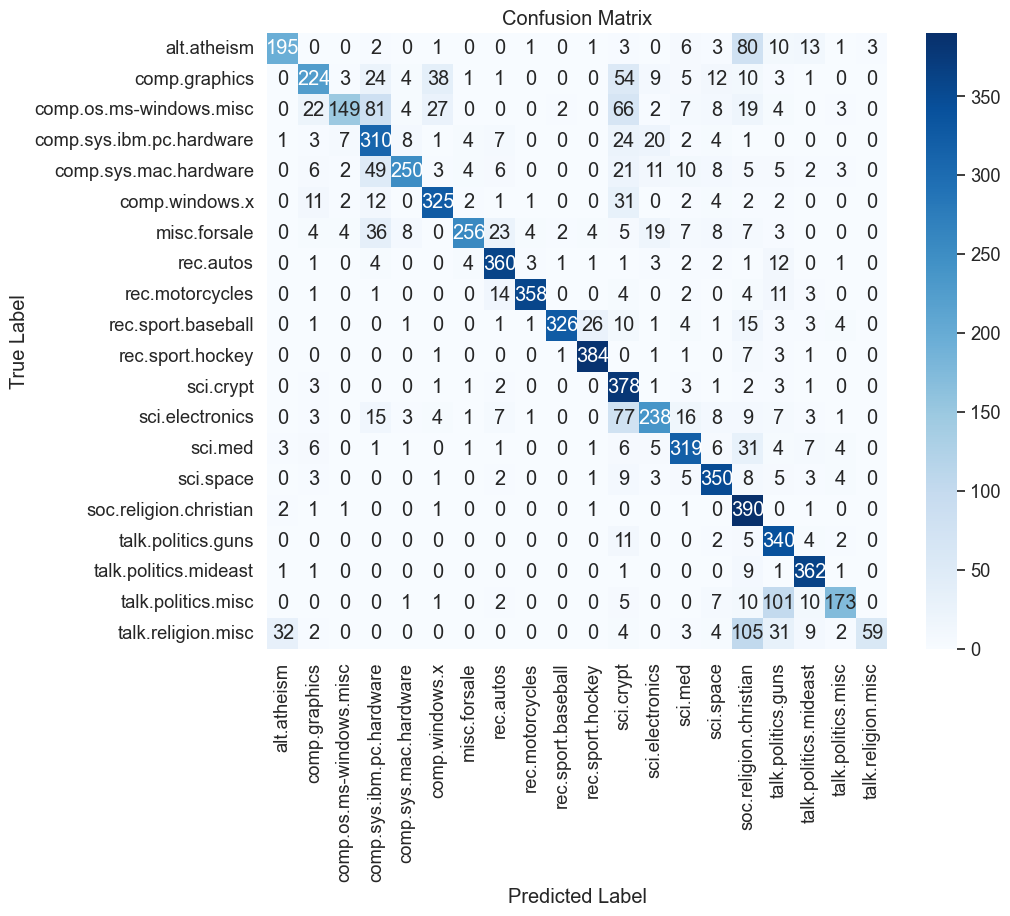

In [31]:
#VISUALIZATION(CONFUSION MATRIX)
cm = confusion_matrix(true_labels, predicted_labels, labels=categories)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Futur

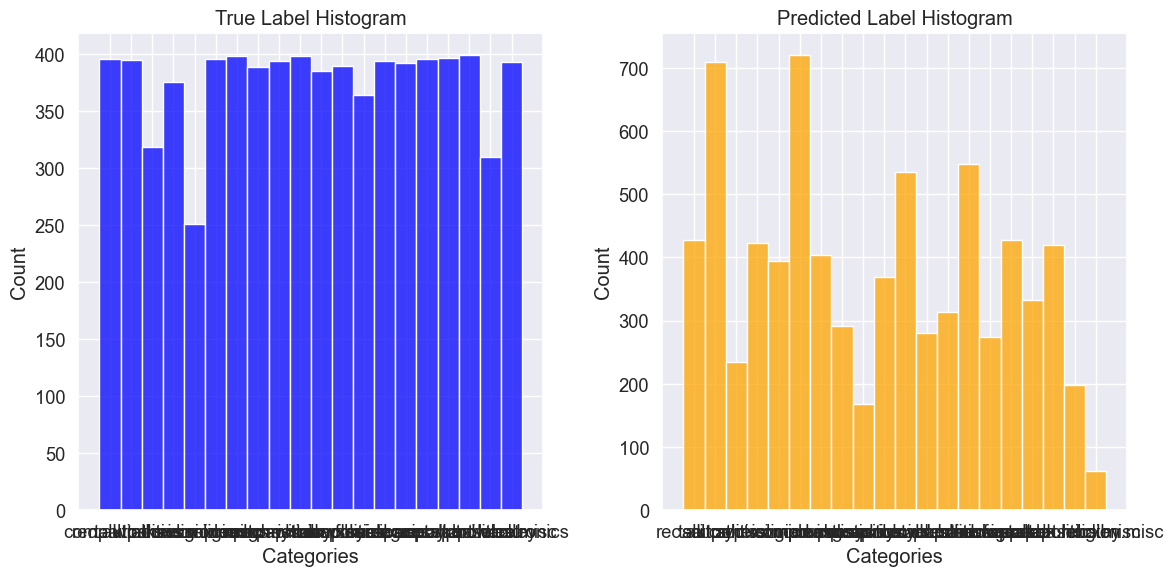

In [25]:
#VISUALIZATION(HISTOGRAM)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(true_labels, bins=len(categories), kde=False, color='blue')
plt.title("True Label Histogram")
plt.xlabel("Categories")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(predicted_labels, bins=len(categories), kde=False, color='orange')
plt.title("Predicted Label Histogram")
plt.xlabel("Categories")
plt.ylabel("Count")

plt.tight_layout()
plt.show()